In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# to make this notebook's output stable across runs.
np.random.seed(42)
tf.random.set_seed(42) # reseta gerador de sequências PN da biblioteca Tensorflow.

### Carregando o conjunto de dados fashion MNIST.

+ O Keras tem várias funções para carregar conjuntos de dados populares em `keras.datasets`.


+ O conjunto total de dados já está dividido em conjuntos de treinamento e de teste.

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

print('Treinamento:', len(y_train_full))
print('Teste:', len(y_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Treinamento: 60000
Teste: 10000


+ Na sequência, dividimos o conjunto de treinamento em um conjunto de validação e um conjunto de treinamento (menor).
    + 5000 exemplos para validação e 55000 para treinamento.


+ Também **escalonamos** as magnitudes dos pixels para o intervalo de 0-1 e as convertemos em floats, dividindo por 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.

print('Validação:', len(y_valid))
print('Treinamento:', len(y_train))

Validação: 5000
Treinamento: 55000


Imprimindo alguns rótulos

**OBS.**: Observem que os rótulos são números de 0 a 9 e não vetores *one-hot*.

In [5]:
y_train[0:100]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4, 0, 1, 8, 6, 3, 6, 4, 3, 2, 8, 7, 3,
       4, 7, 1, 3, 4, 2, 0, 8, 5, 5, 9, 1, 5, 3, 5, 9, 0, 3, 9, 6, 4, 2,
       9, 0, 8, 3, 3, 2, 2, 0, 8, 3, 6, 6, 1, 9, 1, 0, 3, 1, 7, 8, 9, 5,
       4, 5, 6, 3, 0, 7, 9, 8, 0, 3, 2, 6, 2, 5, 8, 2, 3, 9, 5, 2, 8, 1,
       3, 7, 1, 7, 5, 5, 0, 1, 5, 1, 8, 0], dtype=uint8)

Plotando algumas imagens do banco de dados.

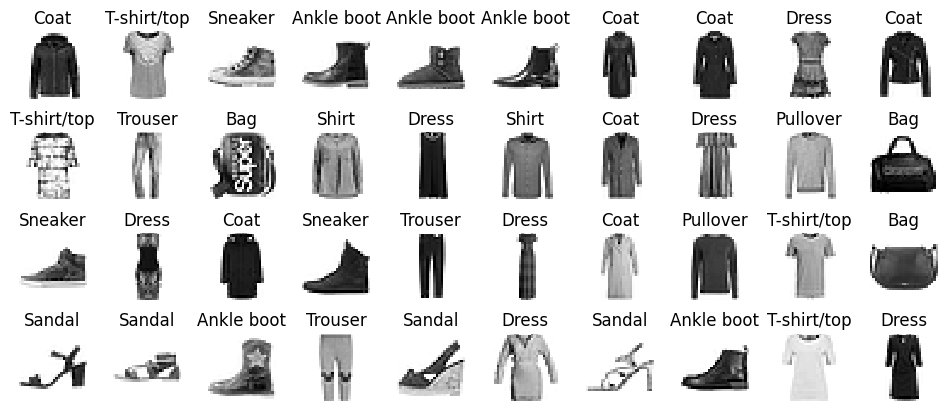

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Criando um modelo sequencial

O modelo abaixo é o de um **classificador MLP com duas camadas ocultas**. Na sequência, descrevemos cada uma das linhas de código da célula abaixo.

+ A primeira linha cria um modelo Sequencial.
+ A primeira camada é a camada de entrada, cuja função é de simplemente trasferir os dados de entrada para a rede neural. Precisamos definir as dimensões dos vetores ou matrizes de atributos.
    + O parâmetro `shape` não inclui o tamanho do mini-batch, apenas as dimensões dos exemplos de entrada, pois o mini-batch é variável.
+ A segunda camada é uma camada `Flatten` cuja função é simplesmente converter cada imagem de entrada ($28 \times 28$) em uma array 1D.
    + Esta camada não possui parâmetros, faz apenas um pré-processamento simples de conversão de dimensões.
+ Em seguida, adicionamos uma camada oculta densa (i.e., classe `Dense`) com 300 neurônios. Ela usará a função de ativação **ReLU**.
+ Em seguida, adicionamos uma segunda camada oculta densa com 100 neurônios, também usando a função de ativação **ReLU**.
+ Por fim, adicionamos uma camada de saída densa com 10 neurônios (um para cada classe), usando o função de ativação **softmax**.

**IMPORTANTE**

+ Outras funções de ativação estão disponíveis no pacote `keras.activations`. Veja a lista completa em https://keras.io/activations/.

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### Resumo do modelo

+ O método `summary()` da classe `Sequential` exibe informações de todas as camadas do modelo, incluindo:
    + O nome de cada camada (que é gerado automaticamente, a menos o definamos ao criar a camada),
    + Seu formato de saída (`None` significa que o tamanho do mini-batch pode ser qualquer um) e
    + Seu número de parâmetros.


+ O método `summary()` termina imprimindo o número total de parâmetros, incluindo treináveis e não treináveis.
    + Parâmetros não treináveis são aqueles que não são atualizados durante o treinamento pela retropropagação do erro. Por exemplo, a média e o desvio padrão na normalização de mini-batches.

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

**IMPORTANTE**

+ Observem que as camadas densas geralmente têm muitos parâmetros. Por exemplo, a primeira camada oculta tem 784 (28 x 28) entradas x 300 nós, mais 300 termos de bias, o que soma 235.500 parâmetros.


+ Isso dá ao modelo **bastante flexibilidade** (ou seja, alto grau de lberdade) para ajustar os dados de treinamento, mas também significa que o modelo corre o risco de **overfitting**, especialmente quando não temos muitos dados de treinamento.


+ As camadas densas têm seus pesos inicializados aleatoriamente e os termos de bias são inicializados com zeros.
    + Se quisermos usar um método de inicialização diferente, podemos definir o parâmetro `kernel_initializer` (kernel é outro nome para a matriz de pesos de conexão) ou `bias_initializer` ao criar a camada.
    + Os vários métodos de incialização estão listados em: https://keras.io/api/layers/initializers/

### Compilando o modelo

+ Depois que um modelo é criado, devemos chamar seu método `compile()` para especificar a **função de custo** e o **otimizador** que devem ser usados.

+ Opcionalmente, também podemos especificar uma lista de métricas extras para calcular durante o treinamento e validação do modelo.

+ Listas com outras funções de custo, otimizadores e métricas podem ser encontaradas nos links abaixo.

    + https://keras.io/losses/,

    + https://keras.io/optimizers/

    + https://keras.io/metrics/.

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**IMPORTANTE**

+ Nós usamos a função de custo `sparse_categorical_crossentropy` porque temos rótulos esparsos (ou seja, para cada exemplo há apenas um índice de classe, de 0 a 9 neste caso).
    + Essa função torna o treinamento mais eficiente e evita valores iguais a zero.


+ Em relação ao otimizador, `sgd` significa simplesmente que treinaremos o modelo usando o **gradiente descendente estocástico**.
    + Quando usamos apenas a string com o nome do otimizador, usamos todos os parâmetros com valor padrão (i.e., `learning_rate=0.01`, `momentum=0.0`, `nesterov=False`).
    

+ Como este é o modelo de um classificador, é útil medir sua acurácia (`accuracy`) durante seu treinamento e validação.

### Treinando e avaliando o modelo

+ Para treinar o modelo, usamos o método `fit()`.
+ Passamos para ele a matriz de atributos de treinamento, `X_train`, e seus respectivos rótulos, `y_train`, bem como o número de épocas para treinar.
+ Também passamos um conjunto de validação (opcional) que é usado para medir o custo e as métricas extras neste conjunto no final de cada época.
    + Se o desempenho no conjunto de treinamento é muito melhor do que no conjunto de validação, o modelo provavelmente está sobreajustando.
+ O treinamento é feito usando-se mini-batches que por padrão têm tamanho igual a 32.

In [10]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid)
                   )

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6937 - loss: 0.9740 - val_accuracy: 0.8276 - val_loss: 0.5131
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8262 - loss: 0.4976 - val_accuracy: 0.8468 - val_loss: 0.4500
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8430 - loss: 0.4453 - val_accuracy: 0.8574 - val_loss: 0.4168
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8533 - loss: 0.4162 - val_accuracy: 0.8654 - val_loss: 0.3966
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8608 - loss: 0.3954 - val_accuracy: 0.8654 - val_loss: 0.3827
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8665 - loss: 0.3792 - val_accuracy: 0.8664 - val_loss: 0.3708
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8704 - loss: 0.3655 - val_accuracy: 0.8694 - val_loss: 0.3614
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.3535 - 

**IMPORTANTE**

+ A cada época durante o treinamento, o modelo exibe o número de mini-batches processados até o momento (junto com uma barra de progresso), o tempo médio de treinamento por mini-batch e época, a perda e a acurácia (ou qualquer outra métrica extra solicitada), tanto no conjunto de treinamento quanto no conjunto de validação (opcional).


+ Podemos ver que a perda de treinamento diminuiu, o que é um bom sinal, e a acurácia da validação atingiu aproximadamente 89% em 30 épocas, não muito longe da acurácia de treinamento, então não parece não estar correndo **sobreajuste**.


+ Em vez de passar um conjunto de validação usando o parâmetro `validation_data`, podemos definir o parâmetro `validation_split` com a proporção do conjunto de treinamento que desejamos que se seja usado para validação (por exemplo, 0.1).

### Avaliando o modelo

+ Ao final do treinamento, o método `fit()` retorna um objeto do tipo `History` que contém, além de outros atributos, um **dicionário** (`history`) com a perda e as métricas extras medidas ao final de cada época no conjunto de treinamento e no conjunto de validação (se houver).




In [11]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


+ Podemos criar um `DataFrame` do Pandas usando este dicionário e chamar seu método `plot()`, para plotar as curvas de loss e acurácia mostradas na figura abaixo.

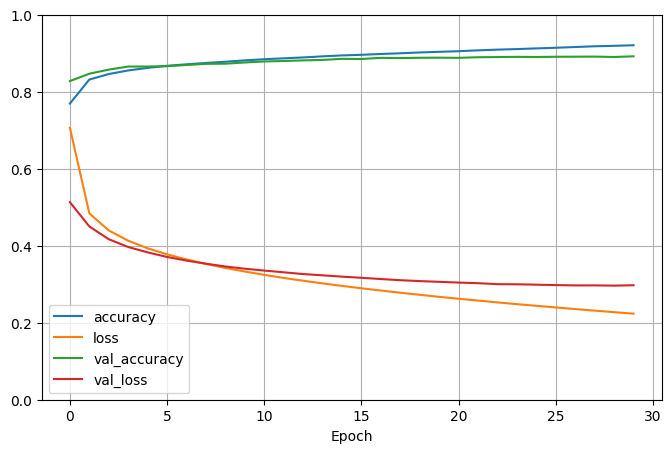

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

**IMPORTANTE**

+ Percebemos que as acurácias de treinamento e de validação aumentam durante o treinamento, enquanto as perdas de treinamento e validação diminuem.


+ Além disso, as curvas de validação estão próximas das curvas de treinamento (loss e acurácia), o que significa que não há muito sobreajuste.


+ Podemos dizer que o modelo ainda não convergiu completamente, pois a perda de validação ainda está diminuindo (não convergiu), então nós provavelmente devemos continuar o treinamento.
    + Para continuar o treinamento, basta chamar o método `fit()` novamente, já que o Keras continua treinando de onde parou.
    + A acurácia no conjunto de validação deve superar os 89% com aproximadamente 50 épocas.
    
  
+ Se não estivermos satisfeitos com o desempenho do modelo, devemos **ajustar os hiperparâmetros** do modelo, por exemplo, o **número de camadas**, o **número de neurônios por camada**, os **tipos de funções de ativação** que usamos para cada camada oculta, o **número das épocas de treinamento**, o **tamanho do mini-batch**.
    + O tamanho do mini-batch pode ser definido no método `fit()` usando o argumento `batch_size`, cujo valor padrão é 32.

### Fazendo predições com o modelo treinado

+ Usamos o método `predict()` do modelo para fazer predições em novos exemplos.
    + Usaremos apenas os 3 primeiros exemplos do conjunto de teste.
    + Esse é o conjunto normalmente usado para se avaliar o grau de generalização do modelo.

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [14]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

Podemos avaliar as métricas do modelo com o método `evaluate`.

In [15]:
loss, acc = model.evaluate(X_test, y_test)

print('Loss:', loss)
print('Accuracy:', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 0.3365
Loss: 0.3353055417537689
Accuracy: 0.8798999786376953


**IMPORTANTE**

+ Como pode ser visto, para cada exemplo o modelo estima uma probabilidade por classe, da classe 0 à classe 9.


+ Por exemplo, para a primeira imagem ele estima que
    + a probabilidade da classe 9 (`Ankle boot`) é de 97%,
    + a probabilidade da classe 7 (`Sneaker`) é de 2%,
    + a probabilidade da classe 5 (`Sandal`) é de 1%,
    + e as demais classes têm probabilidades desprezíveis (`round(2)`).